In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
#hello from kebili
#import necessairry libires 
import tensorflow as tf 
from tensorflow.keras import layers
import numpy as np 
import os 
import PIL 
import matplotlib.pyplot as plt 

In [29]:
#check a data exemple of daata 
from PIL import Image 
image_url='/kaggle/input/almond-varieties/dataset/KAPADOKYA/dsd (1).JPG'
img=Image.open(image_url)
img.size

(680, 447)

In [30]:
image_size=224
batch_size=32
channels=3


In [31]:
#set up data 
train_ds=tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/almond-varieties/dataset",seed=123,subset="training",validation_split=0.2,image_size=(224,224),batch_size=batch_size)

Found 1556 files belonging to 4 classes.
Using 1245 files for training.


In [32]:
#set up data 
test_ds=tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/almond-varieties/dataset",seed=123,subset="validation",validation_split=0.2,image_size=(224,224),batch_size=batch_size)

Found 1556 files belonging to 4 classes.
Using 311 files for validation.


In [33]:
#bulding the resize layer using
resiz_and_rescale=tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(1./225)
])

In [34]:
#building model :
model=tf.keras.Sequential([
    resiz_and_rescale,
   layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(1024,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4 , activation = 'softmax'),
])

In [35]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(train_ds,validation_data=test_ds,epochs=15,verbose=2)

Epoch 1/15


W0000 00:00:1717537455.542496     484 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717537489.463635     487 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


39/39 - 41s - 1s/step - accuracy: 0.2795 - loss: 1.4105 - val_accuracy: 0.3344 - val_loss: 1.3672
Epoch 2/15
39/39 - 5s - 123ms/step - accuracy: 0.3823 - loss: 1.2751 - val_accuracy: 0.6174 - val_loss: 0.9642
Epoch 3/15
39/39 - 5s - 123ms/step - accuracy: 0.6289 - loss: 0.9092 - val_accuracy: 0.6913 - val_loss: 0.7411
Epoch 4/15
39/39 - 5s - 128ms/step - accuracy: 0.7382 - loss: 0.6668 - val_accuracy: 0.6945 - val_loss: 0.7333
Epoch 5/15
39/39 - 5s - 121ms/step - accuracy: 0.7775 - loss: 0.5800 - val_accuracy: 0.7878 - val_loss: 0.5405
Epoch 6/15
39/39 - 5s - 122ms/step - accuracy: 0.8353 - loss: 0.4226 - val_accuracy: 0.8585 - val_loss: 0.4514
Epoch 7/15
39/39 - 5s - 122ms/step - accuracy: 0.8683 - loss: 0.3592 - val_accuracy: 0.8714 - val_loss: 0.3649
Epoch 8/15
39/39 - 5s - 122ms/step - accuracy: 0.8731 - loss: 0.3380 - val_accuracy: 0.7395 - val_loss: 0.7499
Epoch 9/15
39/39 - 5s - 121ms/step - accuracy: 0.8578 - loss: 0.3741 - val_accuracy: 0.8617 - val_loss: 0.3906
Epoch 10/15
39

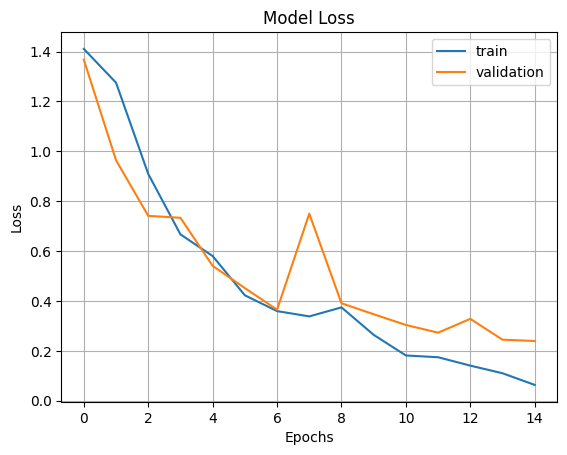

In [37]:
#plot the result 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()